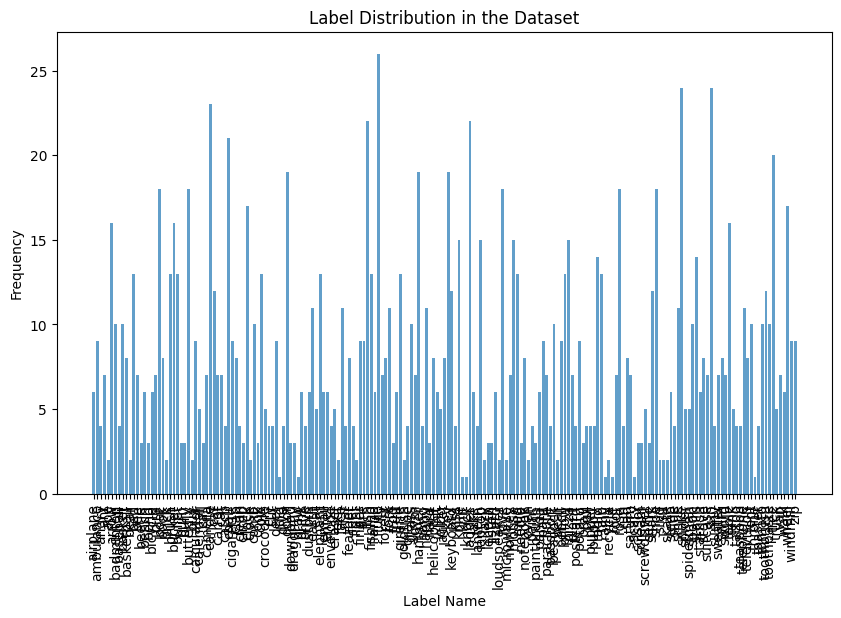

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the .npy file
data = np.load('data.npy', allow_pickle=True)

# Extract the labels (assuming labels are in the 4th column)
labels = data[:, 3]

# Calculate the frequency of each label using NumPy's unique function
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Create a bar graph to visualize the label distribution
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, label_counts, align='center', alpha=0.7)
plt.xlabel('Label Name')
plt.ylabel('Frequency')
plt.title('Label Distribution in the Dataset')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


In [5]:
import numpy as np
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
class KNNClassifier:
    def __init__(self, k=5, distance_metric='manhattan', encoder_type=None):
        self.k = k
        self.distance_metric = distance_metric
        self.encoder_type = encoder_type
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
    def train_val_split(self,X, y, test_size=0.2, random_state=42):
        np.random.seed(random_state)
        indices = np.random.permutation(len(X))
        split_index = int(len(X) * (1 - test_size))
        train_indices, val_indices = indices[:split_index], indices[split_index:]
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_val]
            
        return x_train, x_val, y_train, y_val

    def unshuffled_train_val_split(self,X,y,test_size=0.2):
        total_samples = len(X)
        split_index = int(total_samples * (1 - test_size))

        X_train = X[:split_index]
        X_test = X[split_index:]
        y_train = y[:split_index]
        y_test = y[split_index:]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_test]
        return x_train, x_val, y_train, y_test
    def fit(self, data):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_vit, y)
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_resnet, y)

    def euclidean_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=2)
    def manhattan_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=1)
    def cosine_distance(self, x1, x2) -> float:
        return 1-np.dot(x2,x1)/(np.linalg.norm(x2,axis=1)*np.linalg.norm(x1))
    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")
    def fitpt2(self, data, X_test):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train = X_vit
            self.y_train = y
            self.X_test = X_test
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train = X_resnet
            self.y_train = y
            self.X_test = X_test
        
    def predict(self):
        y_pred = []
        for x in self.X_test:
            distances = self.calculate_distance(x, self.X_train)
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            pred_label = unique_labels[np.argmax(counts)]
            y_pred.append(pred_label)
        print(self.encoder_type)
        print("Accuracy:" + str(accuracy_score(self.y_test,y_pred)))
        print("F1 Score:" + str(f1_score(self.y_test,y_pred,average='macro')))
        print("Precision score:" + str(precision_score(self.y_test,y_pred,average='macro',zero_division=0)))
        print("Recall score:" + str(recall_score(self.y_test,y_pred,average='macro',zero_division=0)))
def train_val_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_index = int(len(X) * (1 - test_size))
    train_indices, val_indices = indices[:split_index], indices[split_index:]
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]
    x_train = [item[0][0] for item in X_train]
    x_val = [item[0][0] for item in X_val]
        
    return x_train, x_val, y_train, y_val
data = np.load('data.npy', allow_pickle=True)
X_vit = data[:, 2:3]
y = data[:, 3] 
X_train, X_test, y_train, y_test = train_val_split(X_vit, y)
knn_classifier = KNeighborsClassifier()
start_time = time.time()
vit_knn = KNNClassifier(k=3, distance_metric='euclidean',encoder_type='VIT')
vit_knn.fit(data=data)
vit_knn.predict()
end_time = time.time()
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
end2_time = time.time()
resnet_knn = KNNClassifier(k=5, distance_metric='cosine',encoder_type='Resnet')
resnet_knn.fit(data=data)
resnet_knn.predict()
execution_time = end_time - start_time
execution_time2 = end2_time - end_time
print(f"Execution time1: {execution_time} seconds")
print(f"Execution time2: {execution_time2} seconds")



VIT
Accuracy:0.23
F1 Score:0.11996945864592923
Precision score:0.13472041847041846
Recall score:0.13798363095238092
Resnet
Accuracy:0.18666666666666668
F1 Score:0.09991161683743176
Precision score:0.09919613295409473
Recall score:0.12427964816499847
Execution time1: 0.3248293399810791 seconds
Execution time2: 0.05169081687927246 seconds


In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
class KNNClassifier:
    def __init__(self, k=5, distance_metric='manhattan', encoder_type=None):
        self.k = k
        self.distance_metric = distance_metric
        self.encoder_type = encoder_type
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
    def train_val_split(self,X, y, test_size=0.2, random_state=42):
        np.random.seed(random_state)
        indices = np.random.permutation(len(X))
        split_index = int(len(X) * (1 - test_size))
        train_indices, val_indices = indices[:split_index], indices[split_index:]
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_val]
            
        return x_train, x_val, y_train, y_val

    def unshuffled_train_val_split(self,X,y,test_size=0.2):
        total_samples = len(X)
        split_index = int(total_samples * (1 - test_size))

        X_train = X[:split_index]
        X_test = X[split_index:]
        y_train = y[:split_index]
        y_test = y[split_index:]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_test]
        return x_train, x_val, y_train, y_test
    def fit(self, data):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_vit, y)
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_resnet, y)

    def euclidean_distance(self, x1, x2):
        # return np.sqrt(np.sum((x1 - x2) ** 2),axis=1)
        return np.linalg.norm(x1-x2,axis=1,ord=2)

    def manhattan_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=1)

    def cosine_distance(self, x1, x2):
        return 1-np.dot(x2,x1)/(np.linalg.norm(x2,axis=1)*np.linalg.norm(x1))

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")
    def fitpt2(self, data, X_test):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train = X_vit
            self.y_train = y
            self.X_test = X_test
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train = X_resnet
            self.y_train = y
            self.X_test = X_test
        
    def predict(self):
        y_pred = []
        for x in self.X_test:
            distances = self.calculate_distance(x, self.X_train)
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            pred_label = unique_labels[np.argmax(counts)]
            y_pred.append(pred_label)
        return accuracy_score(self.y_test,y_pred)
    
data = np.load('data.npy', allow_pickle=True)
k_value = []
accuracy = []
answer = []
for i in ['VIT', 'Resnet']:
    for j in ['manhattan', 'euclidean', 'cosine']:
        for kk in range(1,10,2):
            knn = KNNClassifier(k=kk,distance_metric=j,encoder_type=i)
            knn.fit(data=data)
            ans = knn.predict()
            answer.append([ans,kk,j,i])
            k_value.append(i)
            accuracy.append(ans)
answer.sort(reverse=True)
print("The best triplet is: ")
print("K = " + str(answer[0][1]))
print("Distance metric = " + str(answer[0][2]))
print("Encoder type: " + str(answer[0][3]))
j=0
print()
print("The top 20 triplets are: ")
for i in answer:
    print(i)
    j += 1
    if(j == 20):
        break

The best triplet is: 
K = 7
Distance metric = manhattan
Encoder type: VIT

The top 20 triplets are: 
[0.27666666666666667, 7, 'manhattan', 'VIT']
[0.2633333333333333, 7, 'cosine', 'VIT']
[0.2633333333333333, 1, 'euclidean', 'VIT']
[0.26, 5, 'euclidean', 'VIT']
[0.26, 1, 'manhattan', 'VIT']
[0.25666666666666665, 7, 'euclidean', 'VIT']
[0.25666666666666665, 1, 'cosine', 'VIT']
[0.25, 9, 'euclidean', 'VIT']
[0.25, 5, 'manhattan', 'VIT']
[0.24666666666666667, 9, 'manhattan', 'VIT']
[0.24666666666666667, 9, 'cosine', 'VIT']
[0.24333333333333335, 5, 'cosine', 'VIT']
[0.23, 3, 'euclidean', 'VIT']
[0.22333333333333333, 9, 'manhattan', 'Resnet']
[0.22333333333333333, 3, 'manhattan', 'VIT']
[0.22, 3, 'cosine', 'VIT']
[0.2, 9, 'cosine', 'Resnet']
[0.2, 5, 'manhattan', 'Resnet']
[0.19333333333333333, 9, 'euclidean', 'Resnet']
[0.19333333333333333, 7, 'manhattan', 'Resnet']


[1, 3, 5, 7, 9]
[0.2633333333333333, 0.23, 0.26, 0.25666666666666665, 0.25]


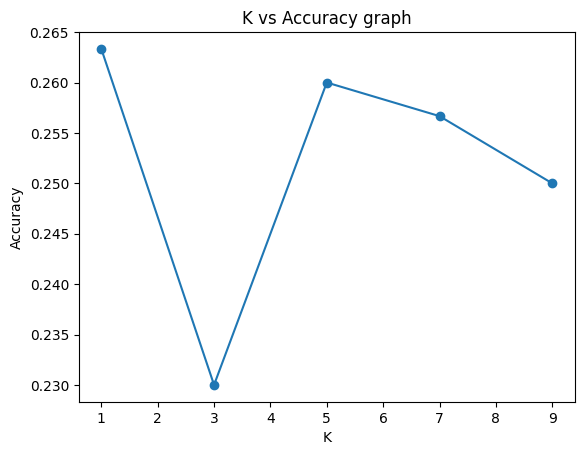

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
class KNNClassifier:
    def __init__(self, k=5, distance_metric='manhattan', encoder_type=None):
        self.k = k
        self.distance_metric = distance_metric
        self.encoder_type = encoder_type
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
    def train_val_split(self,X, y, test_size=0.2, random_state=42):
        np.random.seed(random_state)
        indices = np.random.permutation(len(X))
        split_index = int(len(X) * (1 - test_size))
        train_indices, val_indices = indices[:split_index], indices[split_index:]
        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_val]
            
        return x_train, x_val, y_train, y_val

    def unshuffled_train_val_split(self,X,y,test_size=0.2):
        total_samples = len(X)
        split_index = int(total_samples * (1 - test_size))

        X_train = X[:split_index]
        X_test = X[split_index:]
        y_train = y[:split_index]
        y_test = y[split_index:]
        x_train = [item[0][0] for item in X_train]
        x_val = [item[0][0] for item in X_test]
        return x_train, x_val, y_train, y_test
    def fit(self, data):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_vit, y)
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_val_split(X_resnet, y)

    def euclidean_distance(self, x1, x2):
        # return np.sqrt(np.sum((x1 - x2) ** 2),axis=1)
        return np.linalg.norm(x1-x2,axis=1,ord=2)

    def manhattan_distance(self, x1, x2):
        return np.linalg.norm(x1-x2,axis=1,ord=1)

    def cosine_distance(self, x1, x2):
        return 1-np.dot(x2,x1)/(np.linalg.norm(x2,axis=1)*np.linalg.norm(x1))

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)
        else:
            raise ValueError("Unsupported distance metric")
    def fitpt2(self, data, X_test):
        if self.encoder_type == 'VIT':
            X_vit = data[:, 2:3]
            y = data[:, 3] 
            self.X_train = X_vit
            self.y_train = y
            self.X_test = X_test
        elif self.encoder_type == 'Resnet':
            X_resnet = data[:, 1:2]
            y = data[:, 3] 
            self.X_train = X_resnet
            self.y_train = y
            self.X_test = X_test
        
    def predict(self):
        y_pred = []
        #print(len(X_test[0][0]))
        #print(X_test)
        for x in self.X_test:
            #print(x)
            #distances = [self.calculate_distance(x[0][0], x_train[0][0]) for x_train in self.X_train]
            #self.X_train = self.X_train[0]
            # print(len(self.X_train))
            # print(len(x[0][0]))
            distances = self.calculate_distance(x, self.X_train)
            # distances = np.array([self.calculate_distance(x[0][0], x_train[0][0]) for x_train in self.X_train])
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            pred_label = unique_labels[np.argmax(counts)]
            y_pred.append(pred_label)
        return accuracy_score(self.y_test,y_pred)
        #return np.array(y_pred)

# Load the dataset from data.npy
data = np.load('data.npy', allow_pickle=True)
# X_resnet = data[:, 1:2] 
# X_vit = data[:, 2:3]
# y = data[:, 3] 
    

# X_resnet_train, X_resnet_test, y_resnet_train, y_resnet_test = train_val_split(X_resnet, y)
# X_vit_train, X_vit_test, y_vit_train, y_vit_test = train_val_split(X_vit, y)
k_value = []
accuracy = []
for i in range(1,10,2):
    knn = KNNClassifier(k=i,distance_metric='euclidean',encoder_type='VIT')
    knn.fit(data=data)
    ans = knn.predict()
    k_value.append(i)
    accuracy.append(ans)

print(k_value)
print(accuracy)
plt.plot(k_value, accuracy, marker='o', linestyle='-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy graph')
plt.show()
# def calculate_accuracy(y_true, y_pred):
#     # Implement accuracy calculation
#     return accuracy_score(y_true,y_pred)

# def calculate_f1_score(y_true, y_pred):
#     # Implement F1 score calculation
#     return f1_score(y_true,y_pred,average='macro')

# def calculate_precision(y_true, y_pred,average='macro'):
#     # Implement precision calculation
#     return precision_score(y_true,y_pred,average='macro')

# def calculate_recall(y_true, y_pred):
#     # Implement recall calculation
#     return recall_score(y_true,y_pred,average='macro')

# accuracy_vit = accuracy_score(y_vit_test, y_pred_vit,average='macro')
# f1_score_vit = f1_score(y_vit_test, y_pred_vit,average='macro')
# precision_vit = precision_score(y_vit_test, y_pred_vit,average='macro')
# recall_vit = recall_score(y_vit_test, y_pred_vit,average='macro')

# accuracy_resnet = accuracy_score(y_resnet_test, y_pred_resnet,average='macro')
# f1_score_resnet = f1_score(y_resnet_test, y_pred_resnet,average='macro')
# precision_resnet = precision_score(y_resnet_test, y_pred_resnet,average='macro')
# recall_resnet = recall_score(y_resnet_test, y_pred_resnet,average='macro')
# # print(y_pred_resnet)
# # print(y_resnet_test)
# print("Metrics for VIT-based KNN Classifier:")
# print(f"Accuracy: {accuracy_vit}")
# print(f"F1 Score: {f1_score_vit}")
# print(f"Precision: {precision_vit}")
# print(f"Recall: {recall_vit}")

# print("\nMetrics for ResNet-based KNN Classifier:")
# print(f"Accuracy: {accuracy_resnet}")
# print(f"F1 Score: {f1_score_resnet}")
# print(f"Precision: {precision_resnet}")
# print(f"Recall: {recall_resnet}")
